In [1]:
#Store graphs to notebook
%matplotlib inline
#Data manipulation
import numpy as np
import pandas as pd

(9338, 27)


In [ ]:
#Load in dataset
df = pd.read_csv("BMX_G.csv")
#Number of rows & columns
print(df.shape)

In [2]:
#Checking for null values
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [3]:
#Removing null values for leg & waist
df = df.dropna(subset=['bmxleg','bmxwaist'])
#Printing rows & columns
print(df.shape)

(6899, 27)


Text(0, 0.5, 'Waist Circumference (cm)')

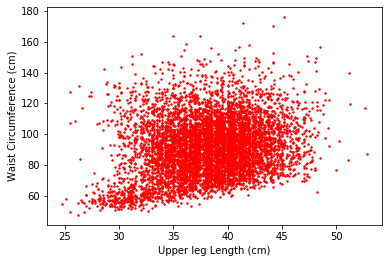

In [4]:
#Scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['bmxleg'],df['bmxwaist'], c='r', s=2)
plt.xlabel("Upper leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")

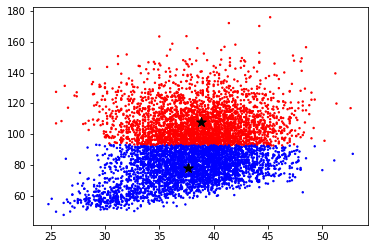

In [5]:
#K = number of clusters
from sklearn.cluster import KMeans
k = 2
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
#Colors for the different clusters
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

In [6]:
#The 2 ideal sizes for upper leg length & waist (cm)
print(centroids)

[[ 37.65555858  77.83919543]
 [ 38.81956522 107.91487578]]


In [29]:
#Finding optimal k with 2 clusters
from sklearn import metrics
silhouette_avgs = []
min_k = 2
#Loop to find optimal k (k=2 to k k=10)
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#Optimal k
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)

Silhouette Coefficients for k = 2 is 0.5165515814944239
Silhouette Coefficients for k = 3 is 0.4722690506878204
Silhouette Coefficients for k = 4 is 0.43610244664413933
Silhouette Coefficients for k = 5 is 0.41766692115543547
Silhouette Coefficients for k = 6 is 0.39278690635508867
Silhouette Coefficients for k = 7 is 0.37849505295709235
Silhouette Coefficients for k = 8 is 0.36136731584115434
Silhouette Coefficients for k = 9 is 0.3411247896841847
Silhouette Coefficients for k = 10 is 0.342861657989422
Optimal K is 2
